## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [4]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
df2 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')

In [7]:
df2

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [8]:
df2[df2['theater_date'].duplicated()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
20,27,NaN,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,42,"Warner Bros.' ""Perry Mason"" series quietly sli...",G,Action and Adventure|Classics|Drama|Mystery an...,NaN,Frederick Hugh Herbert,NaN,NaN,NaN,NaN,65 minutes,NaN
31,43,Based on the play,NR,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson,NaN,NaN,NaN,NaN,75 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1988,When the money-hungry Duke Stuyvesant (Sterlin...,R,Comedy,Les Rose,NaN,NaN,NaN,NaN,NaN,94 minutes,NaN
1549,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,NaN,NaN,NaN,NaN,NaN,NaN,101 minutes,NaN
1551,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaN,NaN,NaN,NaN,92 minutes,NaN
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
df3 = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [11]:
df3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
df3['vote_count'].value_counts()

1       6541
2       3044
3       1757
4       1347
5        969
        ... 
2328       1
6538       1
489        1
2600       1
2049       1
Name: vote_count, Length: 1693, dtype: int64

In [13]:
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [14]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
df4[df4['release_date'].duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
68,69,"Jun 21, 2013",World War Z,"$190,000,000","$202,359,711","$531,514,650"
125,26,"May 27, 2016",Alice Through the Looking Glass,"$170,000,000","$77,042,381","$276,928,112"
168,69,"Jul 21, 2017",Dunkirk,"$150,000,000","$190,068,280","$499,837,368"
216,17,"Jul 1, 2016",The BFG,"$140,000,000","$55,483,770","$199,646,680"
237,38,"Nov 22, 2013",The Hunger Games: Catching Fire,"$130,000,000","$424,668,047","$864,868,047"
...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [16]:
# Initial look at the im.db database to gather information on the schema.

schema_df5 = pd.read_sql("""

SELECT *
    FROM sqlite_master

""", conn)

schema_df5

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [17]:
print(schema_df5['sql'].iloc[1])

CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)


In [18]:
# This pulls movie_basics table

table1 = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

movie_basics = table1

In [19]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [20]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
# This pulls the directors table

table2 = pd.read_sql("""

SELECT *
FROM directors

""", conn)

directors = table2
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [22]:
# This pulls the known for table

table3 = pd.read_sql("""

SELECT *
FROM known_for

""", conn)

known_for = table3

In [23]:
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [24]:
# Pulls in the movie_akas table

pd.read_sql("""

SELECT *
FROM movie_akas

""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [25]:
# Initial look at movie_ratings table

table4 = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)

movie_ratings = table4
table4

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [26]:
# Initial look at persons table

table5 = pd.read_sql("""

SELECT *
FROM persons

""", conn)

persons = table5
table5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [27]:
# Initial look at principals table

table6 = pd.read_sql("""

SELECT *
FROM principals

""", conn)

principals = table6
table6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [28]:
# Initial look at writers table

pd.read_sql("""

SELECT *
FROM writers

""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [29]:
# Attempt at combining the Movie_Basics table with Directors table on Movie_ID

table1 = """
SELECT *
FROM movie_basics
JOIN directors
    USING(movie_id);
"""
firstjoin = pd.read_sql(table1, conn)

# This initially works

In [30]:
# First table success, combining Movie_ratings now with the combined table above

#table2 = """
#SELECT *
#FROM movie_ratings
#JOIN firstjoin
#    USING(movie_id);
#"""
#pd.read_sql(table2, conn)

# This breaks, believe it's an issue moving between SQL and Pandas

In [31]:
# We have the 5 tables that we want to merge in pandas DF's now

movie_basics
directors
movie_ratings
persons
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [32]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [33]:
# movie_basics does not appear to have repeated values based on movie_id

In [34]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [35]:
# firstmerge = movie_basics.merge(directors, on="movie_id", how="left")
# firstmerge

In [36]:
# firstmerge.duplicated().sum()

In [37]:
# secondmerge = firstmerge.merge(movie_ratings, on="movie_id", how="left")
# secondmerge

In [38]:
# thirdmerge = secondmerge.merge(persons, on="person_id", how="left")
# thirdmerge

In [39]:
# fourthmerge = thirdmerge.merge(principals, on="person_id", how="left")
# fourthmerge

In [40]:
# fourthmerge.duplicated().sum()

In [41]:
# sorted(fourthmerge['start_year'].unique())

In [42]:
# fourthmerge[fourthmerge['start_year'] > 2023]

In [43]:
# fourthmerge_yearclean = fourthmerge[fourthmerge['start_year'] <= 2023]

In [44]:
# fourthmerge_yearclean

In [45]:
# In case we want to filter the data further 
# fourthmerge_yearclean = fourthmerge_yearclean[fourthmerge_yearclean['start_year'] > 2018]

In [46]:
# want to just merge movie_basics with movie_ratings
database_merge = movie_basics.merge(movie_ratings, on="movie_id", how="left")
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [47]:
# Test to see duplicates in this table
database_merge[database_merge['primary_title'] == 'Neighbors']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
25009,tt2004420,Neighbors,Neighbors,2014,97.0,Comedy,6.3,266020.0
63314,tt3638264,Neighbors,Neighbors,2013,22.0,"Documentary,Drama",NaN,NaN
142543,tt9386300,Neighbors,Neighbors,2018,74.0,Documentary,NaN,NaN
142617,tt9392532,Neighbors,Neighbors,2018,90.0,"Comedy,Drama",7.6,18.0
144711,tt9702034,Neighbors,Neighbors,2012,NaN,Drama,NaN,NaN


In [48]:
# We see that there are unique movie_id's so this indicates that the title is used more than once.

In [49]:
database_merge['primary_title'].duplicated().value_counts()

False    136071
True      10073
Name: primary_title, dtype: int64

In [50]:
database_merge = database_merge[database_merge['start_year'] <= 2023]
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [51]:
# Check to see if movie_id is repeated
database_merge['movie_id'].duplicated().sum()

0

In [52]:
# DF1 is movie_gross.csv
# DF4 is movie_budgets.csv

df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [54]:
df1['title'].duplicated().sum()

1

In [55]:
df1_duplicated = df1[df1['title'].duplicated()]
df1_duplicated

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [56]:
df1[df1['title'] == "Bluebeard"]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [57]:
# rename title as movie to match with df4
df1 = df1.rename(columns={'title': 'movie'})

In [58]:
df1

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [59]:
df1[df1['movie'] == "Neighbors"]

,movie,studio,domestic_gross,foreign_gross,year
1506,Neighbors,Uni.,150200000.0,120500000,2014


In [60]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [61]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [62]:
df4['movie'].duplicated().sum()

84

In [63]:
df4[df4['movie'] == 'Venom']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
302,3,"Oct 5, 2018",Venom,"$116,000,000","$213,511,408","$853,628,605"
2313,14,"Sep 16, 2005",Venom,"$25,000,000","$881,745","$881,745"


In [64]:
# Checking if any values in movie budgets have duplicated values
df4_duplicated = df4[df4['movie'].duplicated()]
df4_duplicated['release_date'].duplicated().sum()

1

In [65]:
df4_duplicated.sort_values('movie', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2313,14,"Sep 16, 2005",Venom,"$25,000,000","$881,745","$881,745"
4583,84,"Nov 3, 2006",Unknown,"$3,700,000","$26,403","$3,355,048"
3403,4,"Apr 21, 2017",Unforgettable,"$12,000,000","$11,368,012","$16,221,211"
2619,20,"Mar 6, 1998",Twilight,"$20,000,000","$15,055,091","$15,055,091"
5330,31,"Dec 31, 2012",Trance,"$950,000",$0,$0
...,...,...,...,...,...,...
4120,21,"Oct 17, 1956",Around the World in 80 Days,"$6,000,000","$42,000,000","$42,000,000"
4759,60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"


In [66]:
# attempt to separate release_date to have a separate column for year
df4['year'] = pd.DatetimeIndex(df4['release_date']).year
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [67]:
df4[df4['movie'] == 'Neighbors']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
2763,64,"May 9, 2014",Neighbors,"$18,000,000","$150,086,800","$270,944,428",2014


In [68]:
# test merge of DF1 (movie gross) and DF4(movie budgets), based on the release_data and movie name conditions
#csvmerge = pd.merge(df1, df4, how = 'left', left_on=['year', 'title'], right_on=['year', 'movie'])
#csvmerge
#this merge may have introduced duplicates

In [69]:
# csvmerge = df1.merge(df4, on=['movie', 'year'])
# csvmerge

In [70]:
# csvmerge[csvmerge['movie'] == "Neighbors"]

In [71]:
# csvmerge['movie'].duplicated().sum()

In [72]:
df1

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [73]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [74]:
database_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [75]:
# change database_merge year_start column to year to match with our csv_merge

database_merge = database_merge.rename(columns={'start_year': 'year'})
database_merge

,movie_id,primary_title,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [76]:
# change database_merge primar_title to movie to match with our csv_merge
database_merge = database_merge.rename(columns={'primary_title': 'movie'})
database_merge

,movie_id,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [77]:
database_merge.duplicated().sum()

0

In [78]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [79]:
# We have our two tables (database_merge 146k rows, and csvmerge 3387 rows, that we want to combine based on the movie titles)

dataset_start = df4.merge(database_merge, on=['movie', 'year'], how = 'left')
dataset_start

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,NaN,NaN,NaN,NaN,NaN,NaN
5841,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,NaN,NaN,NaN,NaN,NaN,NaN
5842,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,NaN,NaN,NaN,NaN,NaN,NaN
5843,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
dataset = df4.merge(database_merge, on=['movie', 'year'])
dataset

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1543,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt4931374,Exeter,92.0,None,NaN,NaN
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [81]:
dataset_naclean = dataset.dropna()

In [82]:
dataset_naclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1490 non-null   int64  
 1   release_date       1490 non-null   object 
 2   movie              1490 non-null   object 
 3   production_budget  1490 non-null   object 
 4   domestic_gross     1490 non-null   object 
 5   worldwide_gross    1490 non-null   object 
 6   year               1490 non-null   int64  
 7   movie_id           1490 non-null   object 
 8   original_title     1490 non-null   object 
 9   runtime_minutes    1490 non-null   float64
 10  genres             1490 non-null   object 
 11  averagerating      1490 non-null   float64
 12  numvotes           1490 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 163.0+ KB


In [83]:
dataset_naclean['movie'].duplicated().sum()

31

In [84]:
dataset_naclean[dataset_naclean['movie'] == 'Spotlight']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
814,34,"Nov 6, 2015",Spotlight,"$20,000,000","$45,055,776","$92,088,460",2015,tt1895587,Spotlight,129.0,"Crime,Drama",8.1,365110.0
815,34,"Nov 6, 2015",Spotlight,"$20,000,000","$45,055,776","$92,088,460",2015,tt7785302,Spotlight,99.0,Drama,8.0,12.0


In [85]:
dataset_naclean = dataset_naclean.sort_values('numvotes', ascending = False).drop_duplicates('movie').sort_index()
dataset_naclean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [86]:
dataset_naclean[dataset_naclean['movie'] == 'Spotlight']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
814,34,"Nov 6, 2015",Spotlight,"$20,000,000","$45,055,776","$92,088,460",2015,tt1895587,Spotlight,129.0,"Crime,Drama",8.1,365110.0


In [87]:
dataset_naclean['movie'].duplicated().sum()

0

In [121]:
dataset_final = dataset_naclean
dataset_final

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,45,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",2017,tt4393036,Emily,83.0,Drama,6.8,13.0
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [123]:
dataset_final.to_csv('masterdatasetcleaned.csv')

In [88]:
dataset_naclean_duplicated = dataset_naclean[dataset_naclean.duplicated(subset = ['movie', 'year'])]
dataset_naclean_duplicated.sort_values(by='movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes


In [89]:
# dataset_duplicated = dataset[dataset.duplicated(subset =['movie', 'year'])]
# dataset_duplicated.sort_values(by='movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
1098,84,"Jun 24, 2011",A Better Life,"$10,000,000","$1,759,252","$1,884,251",2011,tt2027265,Une vie meilleure,110.0,Drama,6.6,1519.0
582,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359",2011,tt2447982,Abduction,84.0,"Horror,Thriller",5.2,10.0
1529,6,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",2011,tt7501544,Absentia,60.0,Sci-Fi,NaN,NaN
1231,96,"Oct 10, 2014",Addicted,"$5,000,000","$17,390,770","$17,499,242",2014,tt3435418,Addicted,97.0,"Documentary,Music",NaN,NaN
1466,2,"Dec 31, 2012",After,"$650,000",$0,$0,2012,tt2404163,After,83.0,Romance,6.3,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,5,"Dec 31, 2013",Treachery,"$625,000",$0,$0,2013,tt3763580,Treachery,73.0,Drama,NaN,NaN
1291,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,tt6869948,Truth or Dare,92.0,"Comedy,Drama,Romance",NaN,NaN
1342,41,"Aug 16, 2013",Underdogs,"$2,500,000","$35,017","$1,392,649",2013,tt2123342,Underdogs,102.0,"Drama,Family,Sport",5.8,882.0
1513,43,"Sep 23, 2011",Weekend,"$190,000","$484,592","$1,577,585",2011,tt1791679,Weekend,121.0,"Action,Comedy,Crime",4.0,583.0


In [90]:
# dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1547 non-null   int64  
 1   release_date       1547 non-null   object 
 2   movie              1547 non-null   object 
 3   production_budget  1547 non-null   object 
 4   domestic_gross     1547 non-null   object 
 5   worldwide_gross    1547 non-null   object 
 6   year               1547 non-null   int64  
 7   movie_id           1547 non-null   object 
 8   original_title     1547 non-null   object 
 9   runtime_minutes    1521 non-null   float64
 10  genres             1541 non-null   object 
 11  averagerating      1498 non-null   float64
 12  numvotes           1498 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 169.2+ KB


In [91]:
# dataset_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 34 to 1543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 63 non-null     int64  
 1   release_date       63 non-null     object 
 2   movie              63 non-null     object 
 3   production_budget  63 non-null     object 
 4   domestic_gross     63 non-null     object 
 5   worldwide_gross    63 non-null     object 
 6   year               63 non-null     int64  
 7   movie_id           63 non-null     object 
 8   original_title     63 non-null     object 
 9   runtime_minutes    54 non-null     float64
 10  genres             57 non-null     object 
 11  averagerating      37 non-null     float64
 12  numvotes           37 non-null     float64
dtypes: float64(3), int64(2), object(8)
memory usage: 6.9+ KB


In [92]:
# dataset[dataset['movie'] == 'Underdogs']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
1341,41,"Aug 16, 2013",Underdogs,"$2,500,000","$35,017","$1,392,649",2013,tt1634003,Metegol,106.0,"Adventure,Animation,Family",6.5,8197.0
1342,41,"Aug 16, 2013",Underdogs,"$2,500,000","$35,017","$1,392,649",2013,tt2123342,Underdogs,102.0,"Drama,Family,Sport",5.8,882.0


In [93]:
# dataset.isna().sum()

id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
year                  0
movie_id              0
original_title        0
runtime_minutes      26
genres                6
averagerating        49
numvotes             49
dtype: int64

In [94]:
dataset.to_csv('masterdatasetdraft.csv')

In [95]:
!ls

CONTRIBUTING.md              masterdatasetdraft.csv
LICENSE.md                   movie_data_erd.jpeg
README.md                    moviegenres.jpeg
albert_phase1_notebook.ipynb moviegenres.pdf
awesome.gif                  moviegenres.png
masterdataset.csv            student.ipynb
masterdatasetcleaned.csv     zippedData


In [96]:
dataset_cleaned = dataset.dropna(subset=['production_budget'])

In [97]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1547 non-null   int64  
 1   release_date       1547 non-null   object 
 2   movie              1547 non-null   object 
 3   production_budget  1547 non-null   object 
 4   domestic_gross     1547 non-null   object 
 5   worldwide_gross    1547 non-null   object 
 6   year               1547 non-null   int64  
 7   movie_id           1547 non-null   object 
 8   original_title     1547 non-null   object 
 9   runtime_minutes    1521 non-null   float64
 10  genres             1541 non-null   object 
 11  averagerating      1498 non-null   float64
 12  numvotes           1498 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 169.2+ KB


In [99]:
!ls

CONTRIBUTING.md              masterdatasetdraft.csv
LICENSE.md                   movie_data_erd.jpeg
README.md                    moviegenres.jpeg
albert_phase1_notebook.ipynb moviegenres.pdf
awesome.gif                  moviegenres.png
masterdataset.csv            student.ipynb
masterdatasetcleaned.csv     zippedData


In [100]:
dataset_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1543,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt4931374,Exeter,92.0,None,NaN,NaN
1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [101]:
dataset_cleaned[dataset_cleaned['original_title'] == 'Neighbors']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
878,64,"May 9, 2014",Neighbors,"$18,000,000","$150,086,800","$270,944,428",2014,tt2004420,Neighbors,97.0,Comedy,6.3,266020.0


In [102]:
dataset_cleaned.reset_index()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0
1,1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
2,2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
3,3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
4,4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1542,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0
1543,1543,49,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",2015,tt4931374,Exeter,92.0,None,NaN,NaN
1544,1544,52,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0
1545,1545,59,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0


In [103]:
dataset_cleaned.value_counts(subset = ['genres']).head(30)

genres                    
Drama                         68
Adventure,Animation,Comedy    67
Comedy                        56
Comedy,Drama,Romance          52
Action,Adventure,Sci-Fi       52
Comedy,Drama                  49
Comedy,Romance                41
Action,Crime,Drama            39
Documentary                   36
Drama,Romance                 34
Action,Comedy,Crime           32
Horror,Mystery,Thriller       31
Action,Adventure,Fantasy      31
Action,Adventure,Drama        28
Drama,Thriller                25
Horror,Thriller               24
Action,Crime,Thriller         23
Action,Adventure,Comedy       22
Crime,Drama,Thriller          22
Horror                        20
Biography,Drama,History       20
Action,Thriller               20
Biography,Comedy,Drama        18
Biography,Drama               16
Crime,Drama,Mystery           16
Action,Adventure,Animation    15
Action,Drama,Thriller         14
Adventure,Family,Fantasy      14
Drama,Horror,Mystery          13
Action,Adventure

In [104]:
top10genre_series = dataset_cleaned['genres'].value_counts()[:10]
top10genre_series

Drama                         68
Adventure,Animation,Comedy    67
Comedy                        56
Comedy,Drama,Romance          52
Action,Adventure,Sci-Fi       52
Comedy,Drama                  49
Comedy,Romance                41
Action,Crime,Drama            39
Documentary                   36
Drama,Romance                 34
Name: genres, dtype: int64

In [105]:
top10genre_series[top10genre_series > 40]

Drama                         68
Adventure,Animation,Comedy    67
Comedy                        56
Comedy,Drama,Romance          52
Action,Adventure,Sci-Fi       52
Comedy,Drama                  49
Comedy,Romance                41
Name: genres, dtype: int64

In [106]:
top10genre_genres = list(top10genre_series.index)
top10genre_values = list(top10genre_series.values)

print(top10genre_genres)
print(top10genre_values)

['Drama', 'Adventure,Animation,Comedy', 'Comedy', 'Comedy,Drama,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Drama', 'Comedy,Romance', 'Action,Crime,Drama', 'Documentary', 'Drama,Romance']
[68, 67, 56, 52, 52, 49, 41, 39, 36, 34]


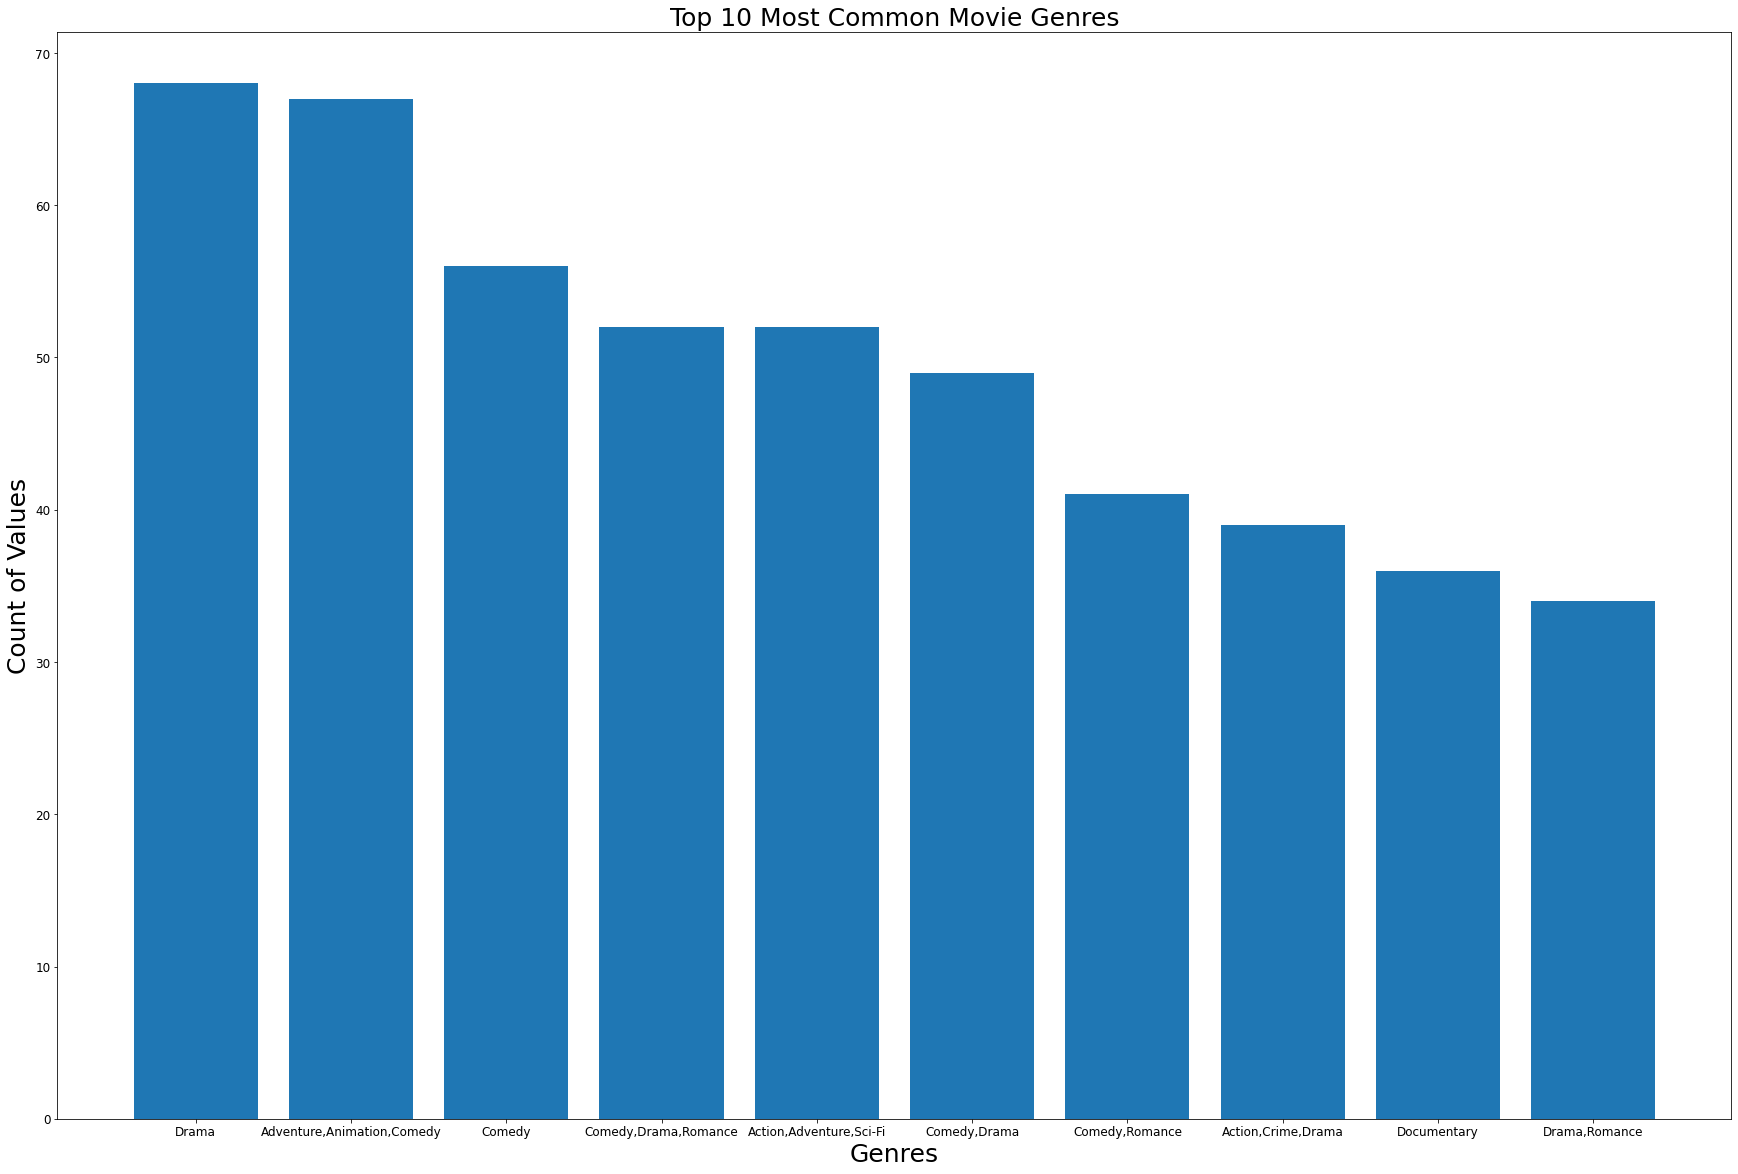

In [107]:
bar_chart_title = "Top 10 Most Common Movie Genres"

fig, ax = plt.subplots(figsize = (30, 20))

ax.bar(top10genre_genres, top10genre_values)

ax.set_ylabel("Count of Values", fontsize = 25)
ax.set_xlabel("Genres", fontsize = 25)
ax.set_title(bar_chart_title, fontsize = 25)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('moviegenres.jpeg', bbox_inches = 'tight');

In [108]:
!ls

CONTRIBUTING.md              masterdatasetdraft.csv
LICENSE.md                   movie_data_erd.jpeg
README.md                    moviegenres.jpeg
albert_phase1_notebook.ipynb moviegenres.pdf
awesome.gif                  moviegenres.png
masterdataset.csv            student.ipynb
masterdatasetcleaned.csv     zippedData


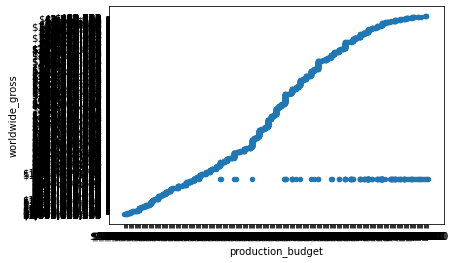

In [109]:
# scatter plot with averagerating vs. worldwide_gross

dataset_cleaned.plot.scatter(x = 'production_budget', y = "worldwide_gross");

In [110]:
dataset_cleaned2 = dataset_cleaned.copy()

In [111]:
# formatting worldwide gross and production budget to integer values
dataset_cleaned2['worldwide_gross'] = dataset_cleaned2['worldwide_gross'].str[1:]

In [112]:
dataset_cleaned2['worldwide_gross'] = dataset_cleaned2['worldwide_gross'].str.replace(',','')

In [113]:
dataset_cleaned2['worldwide_gross'] = dataset_cleaned2['worldwide_gross'].astype(int)

In [114]:
dataset_cleaned2['production_budget'] = dataset_cleaned2['production_budget'].str[1:]

In [115]:
dataset_cleaned2['production_budget'] = dataset_cleaned2['production_budget'].str.replace(',','')

In [116]:
dataset_cleaned2['production_budget'] = dataset_cleaned2['production_budget'].astype(int)

In [117]:
dataset_cleaned2['profit'] = dataset_cleaned2['worldwide_gross'] - dataset_cleaned2['production_budget']

In [118]:
dataset_cleaned2['ROI'] = dataset_cleaned2['profit'] / dataset_cleaned2['production_budget'] * 100

In [119]:
dataset_cleaned2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0,635063875,154.667286
1,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-200237650,-57.210757
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963,324.384139
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200,582.711400
4,9,"Nov 17, 2017",Justice League,300000000,"$229,024,295",655945209,2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0,355945209,118.648403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,tt1945044,Exeter,91.0,"Horror,Mystery,Thriller",4.5,5156.0,464792,1859.168000
1543,49,"Sep 1, 2015",Exeter,25000,$0,489792,2015,tt4931374,Exeter,92.0,None,NaN,NaN,464792,1859.168000
1544,52,"Dec 1, 2015",Dutch Kills,25000,$0,0,2015,tt2759066,Dutch Kills,90.0,"Crime,Drama,Thriller",5.1,82.0,-25000,-100.000000
1545,59,"Nov 25, 2011",The Ridges,17300,$0,0,2011,tt1781935,The Ridges,89.0,"Drama,Horror,Thriller",2.9,127.0,-17300,-100.000000


In [120]:
dataset_cleaned2.sort_values('ROI', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI
1521,80,"Jul 10, 2015",The Gallows,100000,"$22,764,410",41656474,2015,tt2309260,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763.0,41556474,41556.474000
1423,12,"Jan 6, 2012",The Devil Inside,1000000,"$53,262,945",101759490,2012,tt1560985,The Devil Inside,83.0,Horror,4.2,33522.0,100759490,10075.949000
1303,65,"Oct 20, 2010",Paranormal Activity 2,3000000,"$84,752,907",177512032,2010,tt1536044,Paranormal Activity 2,91.0,Horror,5.7,93122.0,174512032,5817.067733
1208,49,"Feb 24, 2017",Get Out,5000000,"$176,040,665",255367951,2017,tt5052448,Get Out,104.0,"Horror,Mystery,Thriller",7.7,400474.0,250367951,5007.359020
1398,64,"Oct 21, 2016",Moonlight,1500000,"$27,854,931",65245512,2016,tt4975722,Moonlight,111.0,Drama,7.4,227964.0,63745512,4249.700800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,45,"Apr 13, 2012",Detention,10000000,$0,0,2012,tt8408152,Detention,NaN,Horror,NaN,NaN,-10000000,-100.000000
1113,47,"May 19, 2015",Into the Grizzly Maze,10000000,$0,0,2015,tt1694021,Into the Grizzly Maze,94.0,"Action,Adventure,Drama",5.3,7006.0,-10000000,-100.000000
1329,73,"Dec 31, 2015",Unnatural,3000000,$0,0,2015,tt3551400,Unnatural,89.0,"Action,Horror,Sci-Fi",4.0,1590.0,-3000000,-100.000000
370,52,"Dec 11, 2015",The Ridiculous 6,60000000,$0,0,2015,tt2479478,The Ridiculous 6,119.0,"Comedy,Western",4.8,38694.0,-60000000,-100.000000
